In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from dnsmex.dnsm_oe import write_sites_oe
from dnsmex.local import localify

figures_dir = localify("FIGURES_DIR")

Matplotlib is building the font cache; this may take a moment.


In [2]:
dataset_name = "v1rodriguez"

Loading /Users/matsen/data/v1/rodriguez-airr-seq-race-prod-InclMutInv_pcp_2024-11-12_MASKED_NI_noN_no-naive.csv.gz
Filtering out problematic pairs of sample_id and clonal families [('sample-igg-SC-18', 440)]
Using cached models: /Users/matsen/re/netam/netam/_pretrained/thrifty-0.2.0.zip
Using ThriftyHumV0.2-59 for neutral model on device None


Evaluating model: 100%|██████████| 3626/3626 [00:06<00:00, 590.40it/s] 


Loading model
Loading branch lengths


Calculating model predictions: 100%|██████████| 22/22 [02:06<00:00,  5.77s/it]


Preparing heavy chain plot data
ANARCI seq length mismatch! sample-igg-SC-13 2013
ANARCI seq length mismatch! sample-igg-SC-15 925
Invalid IMGT insertion: 68.1 sample-igg-SC-18 440
ANARCI seq length mismatch! sample-igg-SC-19 1803
IMGT mismatch with CDR annotation! sample-igg-W-25 4
IMGT mismatch with CDR annotation! sample-igg-W-19 41
Invalid IMGT insertion: 119.1 sample-igg-W-37 140
IMGT mismatch with CDR annotation! sample-igg-W-37 1
Invalid IMGT insertion: 119.1 sample-igg-W-3 17
Invalid IMGT insertion: 119.1 sample-igg-W-34 200
Computing site substitution probabilities dataframe...


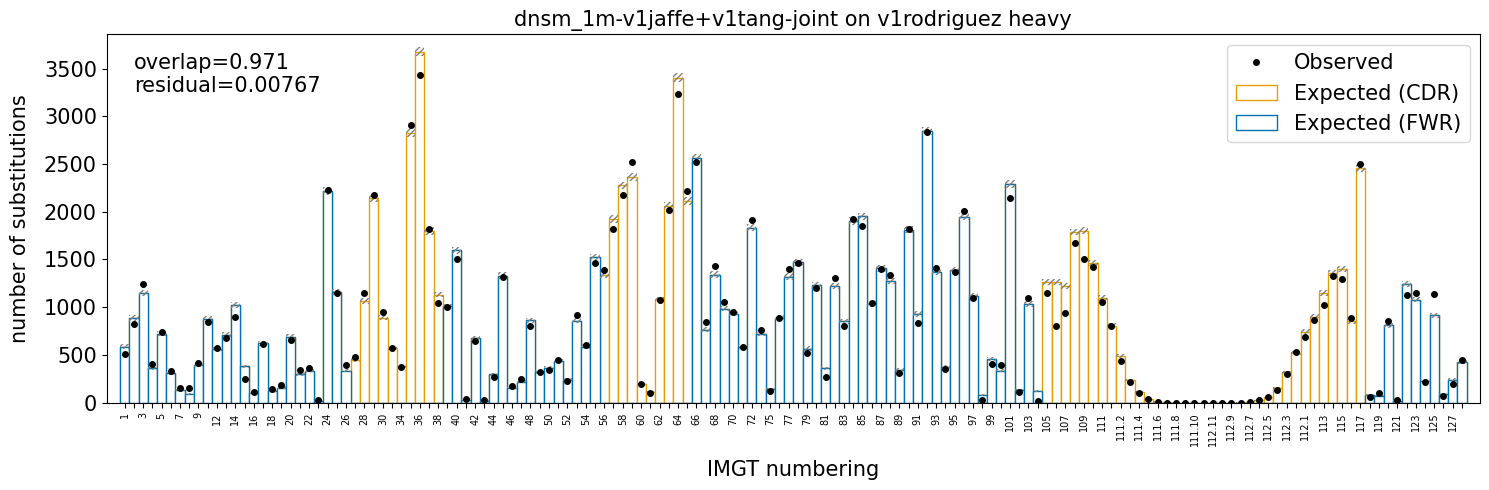

In [3]:
model_name = "dnsm_1m-v1jaffe+v1tang-joint"

crepe_prefix = localify(f"DNSM_TRAINED_MODELS_DIR/{model_name}")
test_output_prefix = localify(f"DNSM_TEST_OUTPUT_DIR/{model_name}-ON-{dataset_name}")
fig, ax = plt.subplots(figsize=[15,5])

complete_plotter, plotter_dict = write_sites_oe(
    crepe_prefix=crepe_prefix,
    dataset_name=dataset_name,
    branch_length_path=f"{test_output_prefix}.branch_lengths_csv",
    csv_output_path=f"{test_output_prefix}-sites-oe.csv",
    fig_out_path=f"{figures_dir}/sites-oe-rodriguez-all.svg",
    min_log_prob=-4,
    replace_title=True,
    v_families=[],
    fig=fig,
)
complete_plotter = complete_plotter["h"]

In [6]:
ax = fig.axes[0]
ax.set_title("mutation model + DASM", fontsize=20)
ax.set_xlabel("sites (IMGT aligned)")
ax.set_ylabel("number of substitutions", fontsize=18)
fig.savefig(f"{figures_dir}/sites-oe-rodriguez-all-dasm.svg", bbox_inches="tight")